# Modelos populares de Redes Convolusionales:

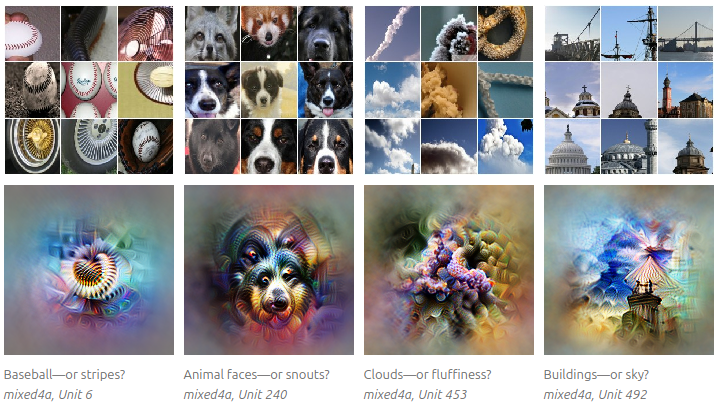
  
Este notebook presenta algunas de las redes convolucionales más populares. Además, se incluyen algunas redes modernas

In [2]:
# Instalar librerías necesarias
!pip install keras-cv --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 650.7/650.7 kB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 50.4 MB/s eta 0:00:00


In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, applications
from tensorflow.keras.applications import VGG16, ResNet50, EfficientNetB0
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions, preprocess_input
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import keras_cv
import time
import requests
from PIL import Image
from io import BytesIO
from IPython.display import Image as GIF

# Modelos de clasificación populares

## LeNet-5: Primer modelo de CNN

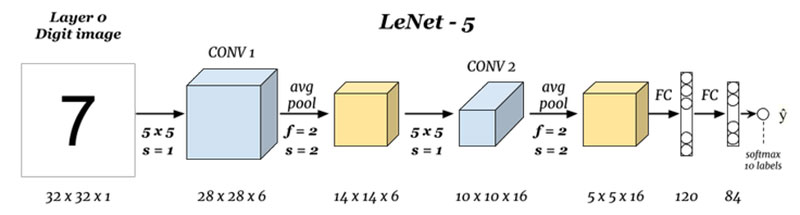

**LeNet-5** es una red neuronal convolucional diseñada originalmente para el reconocimiento de dígitos manuscritos en imágenes de 32x32 píxeles. Su arquitectura se compone de:
1. **Capas convolucionales** para la extracción de características locales.
2. **Capas de Submuestreo (Average Pooling)** para la reducción de la dimensionalidad y aumento de la invarianza a traslaciones.
3. **Capas completamente conectadas (Fully Connected)** para la clasificación final.


**Características:**
- Uso de la función de activación **tanh** en todas las capas ocultas.
- **Average Pooling** en lugar de Max Pooling.
- Sin **padding** en las capas convolucionales.
- Entrenamiento con el algoritmo de retropropagación (Backpropagation).
- Primera arquitectura capaz de reconocer patrones con bajo preprocesamiento.

**Importancia:**  
LeNet-5 fue una de las primeras redes convolucionales en demostrar que las máquinas podían aprender directamente de las imágenes con mínima ingeniería de características. Este modelo inspiró arquitecturas modernas como **AlexNet**, **VGG**, **ResNet** y muchas más.

In [ ]:
def lenet5():
    model = models.Sequential()
    model.add(layers.Conv2D(6, kernel_size=(5, 5), activation='tanh', input_shape=(32, 32, 1), padding='valid'))
    model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(layers.Conv2D(16, kernel_size=(5, 5), activation='tanh', padding='valid'))
    model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(layers.Conv2D(120, kernel_size=(5, 5), activation='tanh', padding='valid'))
    model.add(layers.Flatten())
    model.add(layers.Dense(84, activation='tanh'))
    model.add(layers.Dense(10, activation='softmax'))

    return model

# Crear modelo
model_lenet = lenet5()
model_lenet.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 14, 14, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 10, 10, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_1                  │ (None, 5, 5, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 1, 1, 120)           │          48,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 61,706 (241.04 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

---

## AlexNet

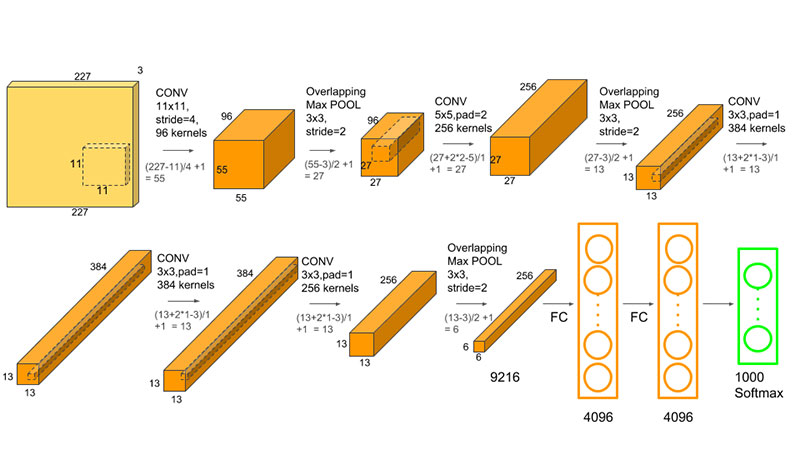

**AlexNet** es una red neuronal convolucional profunda presentada en 2012 para la clasificación de imágenes a gran escala en el desafío **ImageNet Large Scale Visual Recognition Challenge (ILSVRC)**. Su arquitectura marcó un punto de inflexión en la historia del Deep Learning, demostrando por primera vez que las redes neuronales profundas podían superar ampliamente otros métodos tradicionales de visión por computadora.

La red se compone de:
1. **Capas convolucionales profundas** para la extracción de características jerárquicas.
2. **Capas de Max Pooling** para la reducción de la dimensionalidad y aumento de la invarianza a traslaciones.
3. **Capas densas con gran cantidad de neuronas** para la clasificación final.
4. **Capas Dropout** para prevenir el sobreajuste durante el entrenamiento.

**Características:**
- Uso de la función de activación **ReLU (Rectified Linear Unit)**, que acelera la convergencia durante el entrenamiento.
- Regularización con **Dropout** para reducir el sobreajuste.
- Capas convolucionales con filtros de tamaño **grande (11x11 y 5x5)** al inicio.
- Aplicación de **Max Pooling** para la reducción de la dimensionalidad.
- Entrenamiento distribuido usando **GPUs**, una innovación clave en su época.

**Importancia:**  
AlexNet demostró que redes convolucionales profundas podían aprender representaciones de características directamente a partir de los datos, eliminando la necesidad de ingeniería manual de características. Este modelo inspiró una nueva era de arquitecturas como **VGG**, **GoogLeNet**, **ResNet** y **EfficientNet**, consolidando el Deep Learning como una de las herramientas más poderosas en visión por computadora.

In [ ]:
def alexnet():
    model = models.Sequential()

    model.add(layers.Conv2D(96, kernel_size=(11, 11), strides=4, activation='relu', input_shape=(227, 227, 3)))
    model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=2))

    model.add(layers.Conv2D(256, kernel_size=(5, 5), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=2))

    model.add(layers.Conv2D(384, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(384, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=2))

    model.add(layers.Flatten())
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(10, activation='softmax'))  # CIFAR-10 (10 clases)

    return model

# Crear modelo
model_alexnet = alexnet()
model_alexnet.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 55, 55, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 27, 27, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 27, 27, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 13, 13, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 13, 13, 384)         │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 13, 13, 384)         │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 13, 13, 256)         │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4096)                │      37,752,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │          40,970 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 58,322,314 (222.48 MB)

 Trainable params: 58,322,314 (222.48 MB)

 Non-trainable params: 0 (0.00 B)

---

## VGGNet

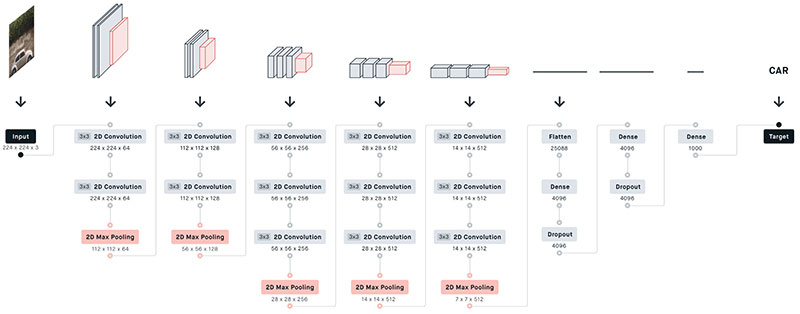

**VGG-16** es una red neuronal convolucional propuesta por el grupo **Visual Geometry Group (VGG)** de la Universidad de Oxford en 2014. Esta arquitectura fue presentada en el desafío **ImageNet Large Scale Visual Recognition Challenge (ILSVRC)**, obteniendo excelentes resultados en la clasificación de imágenes.

La arquitectura se basa en:
1. **Capas convolucionales con filtros pequeños** para la extracción de características con mayor resolución.
2. **Capas de Max Pooling** para la reducción progresiva de la dimensionalidad.
3. **Capas completamente conectadas (Fully Connected)** para la clasificación final.

**Características:**
- Uso de filtros pequeños de **3x3** con paso **1** para todas las capas convolucionales, lo que permite una mejor captura de patrones complejos con menor número de parámetros.
- Aplicación de **Max Pooling** con ventanas de **2x2** para reducir la dimensionalidad de manera progresiva.
- Arquitectura profunda con **16 capas** de pesos entrenables.
- Función de activación **ReLU** en todas las capas ocultas.
- Uso de capas densas con **4096 neuronas** en la etapa de clasificación final.
- Sin capas Dropout en la versión original, pero comúnmente añadido para regularización.

**Importancia:**  
VGG-16 fue una de las primeras arquitecturas en demostrar que aumentar la profundidad de la red podía mejorar significativamente el rendimiento. Su diseño sencillo, basado en filtros pequeños y repetidos, sirvió como base para arquitecturas posteriores como **ResNet** y **Inception**.


In [ ]:
model_vgg = applications.VGG16(weights=None, input_shape=(224, 224, 3), classes=1000)
model_vgg.summary()


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

---

## ResNet

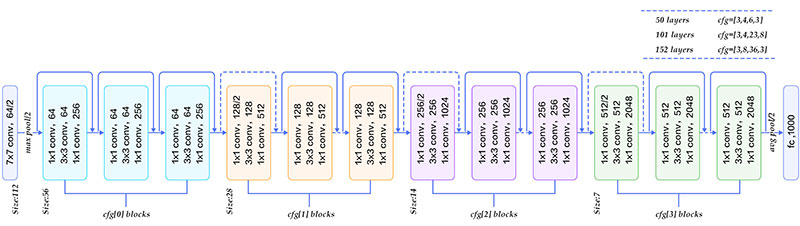

**ResNet** (Red Residual) es una arquitectura de red neuronal convolucional introducida por **Kaiming He et al.** en 2015. Esta red revolucionó el campo del Deep Learning al abordar el problema de la degradación del rendimiento en redes muy profundas, introduciendo la idea de **conexiones residuales (skip connections)**.


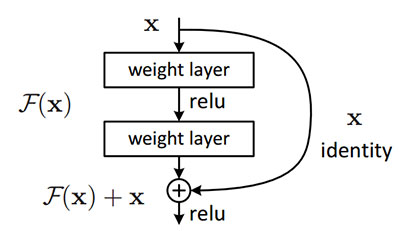  

La arquitectura se compone de:
1. **Bloques residuales (Residual Blocks)** que permiten el flujo directo de información entre capas, facilitando el entrenamiento de redes profundas.
2. **Capas convolucionales con filtros pequeños** para la extracción de características.
3. **Capas de Max Pooling** para la reducción de la dimensionalidad.
4. **Capas completamente conectadas** para la clasificación final.

**Características:**
- Uso de **conexiones residuales** que permiten a la red aprender la diferencia (residuo) entre la salida y la entrada, facilitando el entrenamiento de redes profundas.
- Capas convolucionales con filtros **3x3** en la mayoría de las capas.
- Uso de **Batch Normalization** después de cada convolución para estabilizar el entrenamiento.
- Función de activación **ReLU** en todas las capas ocultas.
- Arquitectura con diferentes profundidades, como **ResNet-18**, **ResNet-34**, **ResNet-50**, **ResNet-101** y **ResNet-152**.
- Entrenamiento con **GPUs**, lo que permitió la creación de redes extremadamente profundas sin pérdida de precisión.

**Importancia:**  
ResNet fue un avance clave en la arquitectura de redes neuronales profundas, ya que demostró que era posible entrenar redes con más de **100 capas** sin degradación del rendimiento. Su innovación ha influido en muchas arquitecturas modernas como **DenseNet**, **EfficientNet** y variantes de **Vision Transformers (ViT)**.


In [ ]:
model_resnet = applications.ResNet50(weights=None, input_shape=(224, 224, 3), classes=1000)
model_resnet.summary()


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 25,636,712 (97.80 MB)

 Trainable params: 25,583,592 (97.59 MB)

 Non-trainable params: 53,120 (207.50 KB)

---

## EfficientNet

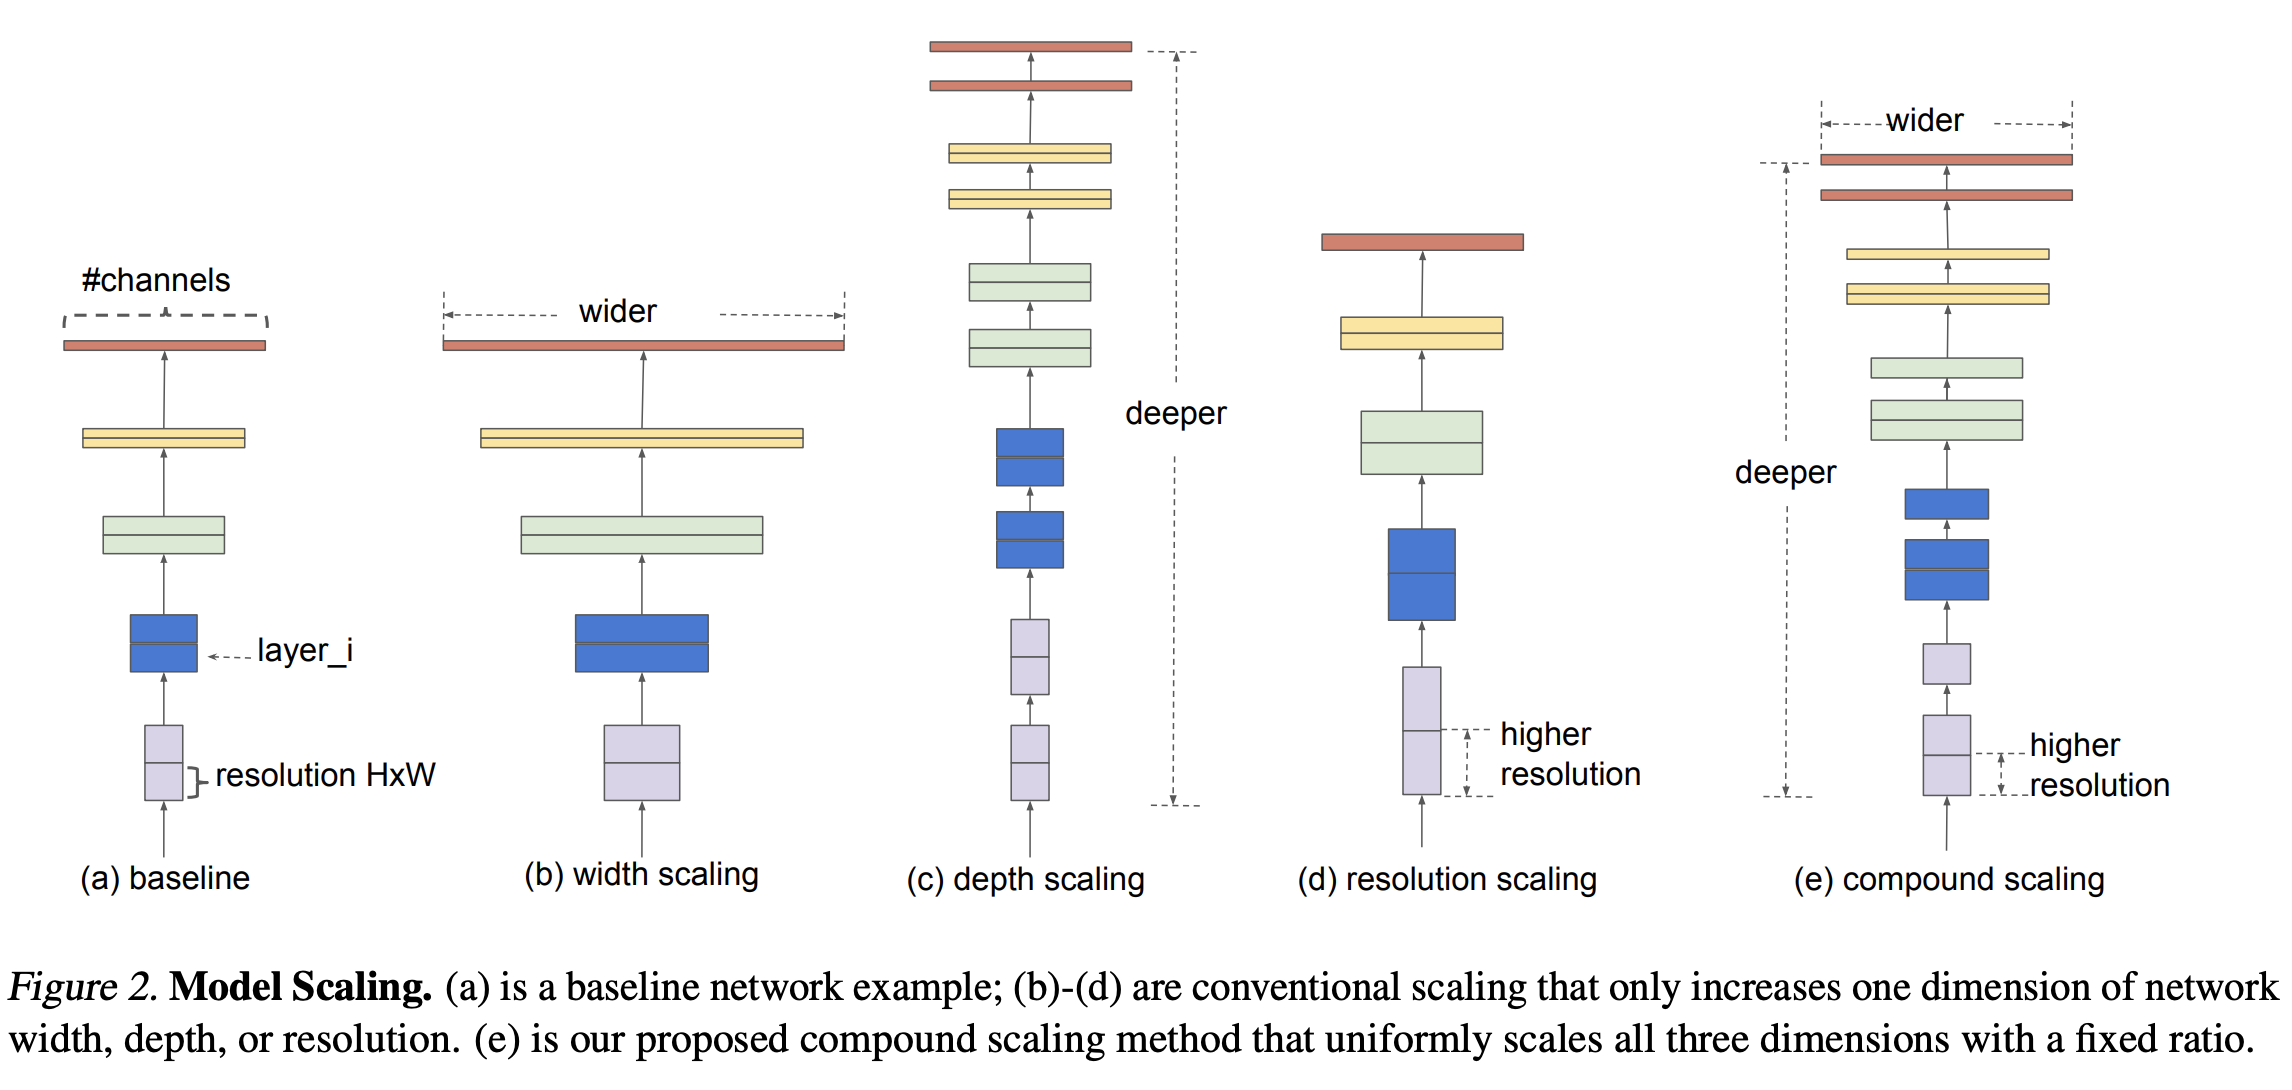

**EfficientNet** es una familia de redes neuronales convolucionales introducida por **Mingxing Tan y Quoc V. Le** en 2019. Esta arquitectura destacó por lograr un equilibrio óptimo entre precisión y eficiencia computacional mediante una técnica novedosa llamada **compound scaling**, que escala conjuntamente la profundidad, el ancho y la resolución de la red.

La arquitectura se compone de:
1. **Capas convolucionales con bloques MBConv (Mobile Inverted Bottleneck Convolution)** para la extracción de características con alta eficiencia computacional.
2. **Capas de Batch Normalization** para estabilizar el entrenamiento.
3. **Capas de Max Pooling** para la reducción de la dimensionalidad.
4. **Capas completamente conectadas** para la clasificación final.


**Características:**
- Uso del bloque **MBConv**, inspirado en **MobileNetV2**, que combina convoluciones con expansión de canales y proyecciones lineales.
- Escalado compuesto que ajusta simultáneamente la **profundidad**, **ancho** y **resolución** de la red para optimizar el rendimiento.
- Función de activación **Swish** en lugar de ReLU, lo que mejora ligeramente la precisión.
- **Batch Normalization** para acelerar el entrenamiento y mejorar la estabilidad.
- Red optimizada para lograr **alta precisión con menos parámetros** en comparación con arquitecturas anteriores.

**EfficientNet** se presentó como una familia de modelos con diferentes tamaños, desde **EfficientNet-B0** (modelo base) hasta **EfficientNet-B7** (modelo más grande), permitiendo elegir la arquitectura adecuada para cada aplicación según los recursos disponibles.  

**Importancia:**  
Gracias a su enfoque de escalado compuesto, **EfficientNet** se ha consolidado como una de las arquitecturas más eficientes para tareas de clasificación de imágenes, sirviendo de inspiración para redes modernas como **Vision Transformers (ViT)** y modelos híbridos.



In [ ]:
model_eff = applications.EfficientNetB0(weights=None, input_shape=(224, 224, 3), classes=1000)
model_eff.summary()

Model: "efficientnetb0"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling (Rescaling)     │ (None, 224, 224, 3)    │              0 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization             │ (None, 224, 224, 3)    │              7 │ rescaling[0][0]        │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv_pad             │ (None, 225, 225, 3)    │              0 │ normalization[0][0]    │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 112, 112, 32)   │            864 │ stem_conv_pad[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 112, 112, 32)   │            128 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 112, 112, 32)   │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_dwconv            │ (None, 112, 112, 32)   │            288 │ stem_activation[0][0]  │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_bn                │ (None, 112, 112, 32)   │            128 │ block1a_dwconv[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_activation        │ (None, 112, 112, 32)   │              0 │ block1a_bn[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_squeeze        │ (None, 32)             │              0 │ block1a_activation[0]… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reshape        │ (None, 1, 1, 32)       │              0 │ block1a_se_squeeze[0]… │
│ (Reshape)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reduce         │ (None, 1, 1, 8)        │            264 │ block1a_se_reshape[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_expand         │ (None, 1, 1, 32)       │            288 │ block1a_se_reduce[0][… │
│ (Conv2D)             

 Total params: 5,330,571 (20.33 MB)

 Trainable params: 5,288,548 (20.17 MB)

 Non-trainable params: 42,023 (164.16 KB)

---

## Vision Transformers (ViT)

In [8]:
GIF(url='https://framerusercontent.com/images/erw4zzdu1g2Sb0lh2oL0KhhsgDM.gif', width=700)

**Vision Transformers (ViT)** es una arquitectura propuesta por **Alexey Dosovitskiy et al.** en 2020, que adapta el modelo de transformadores originalmente utilizado para tareas de procesamiento de lenguaje natural (NLP) a la visión por computadora. Esta arquitectura marcó un cambio de paradigma al demostrar que los transformadores podían superar a las redes convolucionales en tareas de clasificación de imágenes cuando se entrenaban con grandes volúmenes de datos.

La arquitectura se compone de:
1. **Segmentación de la imagen en parches** para convertir la imagen en una secuencia de vectores.
2. **Embedding Posicional** para conservar la información espacial de los parches.
3. **Bloques de Transformador** para modelar las relaciones globales entre los parches.
4. **Capa completamente conectada (Fully Connected)** para la clasificación final.

**Características:**
- División de la imagen en parches cuadrados de tamaño fijo (típicamente **16x16 píxeles**).
- Uso del mecanismo de **atención auto-regresiva (Self-Attention)** para modelar relaciones globales entre regiones de la imagen.
- **Embeddings posicionales** para preservar la información espacial.
- Arquitectura más simple que las CNN, eliminando la convolución explícita.
- Mejores resultados que las redes convolucionales cuando se entrena con grandes volúmenes de datos.

**Importancia:**  

A diferencia de las redes convolucionales, **ViT** procesa la imagen como una secuencia de parches, lo que le permite capturar relaciones globales desde las primeras capas. Esta arquitectura ha abierto el camino hacia nuevos modelos híbridos y ha demostrado que los transformadores pueden ser una alternativa viable a las CNN en visión por computadora.


In [ ]:
def create_vit(image_size=224, patch_size=16, num_classes=1000, num_layers=12, hidden_dim=768, num_heads=12, mlp_dim=3072):
    num_patches = (image_size // patch_size) ** 2

    inputs = keras.Input(shape=(image_size, image_size, 3))

    patches = layers.Conv2D(hidden_dim, patch_size, strides=patch_size)(inputs)
    patches = layers.Reshape((num_patches, hidden_dim))(patches)

    position_embedding = layers.Embedding(input_dim=num_patches, output_dim=hidden_dim)
    positions = tf.range(start=0, limit=num_patches, delta=1)
    patch_embeddings = patches + position_embedding(positions)

    # Bloques de Transformador
    x = patch_embeddings
    for _ in range(num_layers):
        # Capa de Atención
        x1 = layers.LayerNormalization()(x)
        attention_output = layers.MultiHeadAttention(num_heads=num_heads, key_dim=hidden_dim)(x1, x1)
        x = layers.Add()([x, attention_output])

        # MLP
        x2 = layers.LayerNormalization()(x)
        mlp_output = keras.Sequential([
            layers.Dense(mlp_dim, activation='gelu'),
            layers.Dense(hidden_dim),
        ])(x2)
        x = layers.Add()([x, mlp_output])

    # Clasificación
    x = layers.LayerNormalization()(x)
    x = layers.GlobalAveragePooling1D()(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    return keras.Model(inputs=inputs, outputs=outputs)

model_vit = create_vit()
model_vit.summary()


Model: "functional_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_8 (Conv2D)         │ (None, 14, 14, 768)    │        590,592 │ input_layer_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape (Reshape)         │ (None, 196, 768)       │              0 │ conv2d_8[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 196, 768)       │              0 │ reshape[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization       │ (None, 196, 768)       │          1,536 │ add[0][0]              │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention      │ (None, 196, 768)       │     28,339,968 │ layer_normalization[0… │
│ (MultiHeadAttention)      │                        │                │ layer_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_1 (Add)               │ (None, 196, 768)       │              0 │ add[0][0],             │
│                           │                        │                │ multi_head_attention[… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_1     │ (None, 196, 768)       │          1,536 │ add_1[0][0]            │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_2 (Sequential) │ (None, 196, 768)       │      4,722,432 │ layer_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_2 (Add)               │ (None, 196, 768)       │              0 │ add_1[0][0],           │
│                           │                        │                │ sequential_2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_2     │ (None, 196, 768)       │          1,536 │ add_2[0][0]            │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_1    │ (None, 196, 768)       │     28,339,968 │ layer_normalization_2… │
│ (MultiHeadAttention)      │                        │                │ layer_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_3 (Add)               │ (None, 196, 768)       │              0 │ add_2[0][0],           │
│                           │                        │                │ multi_head_attention_… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_3     │ (None, 196, 768)       │          1,536 │ add_3[0][0]            │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_3 (Sequent

 Total params: 398,146,792 (1.48 GB)

 Trainable params: 398,146,792 (1.48 GB)

 Non-trainable params: 0 (0.00 B)

# Empleando algunas de las redes más populares

In [ ]:
def load_image(url, target_size=(224, 224)):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    img = img.resize(target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img, img_array

def show_prediction(model, img, img_array, model_name):
    start_time = time.time()
    preds = model.predict(img_array)
    elapsed_time = time.time() - start_time

    class_id = np.argmax(preds[0])
    confidence = preds[0][class_id]

    print(f"{model_name} Predicción: Clase {class_id}, Confianza: {confidence:.4f}, Tiempo: {elapsed_time:.4f}s")

    plt.imshow(img)
    plt.axis('off')
    plt.title(f"{model_name}\nClase: {class_id}\nConfianza: {confidence:.4f}")
    plt.show()

    return {
        "Modelo": model_name,
        "Clase Predicha": class_id,
        "Confianza": confidence,
        "Tiempo": elapsed_time
    }

def predict_with_model(model, img):
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)
  img_array = preprocess_input(img_array)

  predictions = model.predict(img_array)
  label = decode_predictions(predictions, top=3)[0]

  for i in label:
      print(f'{i[1]}: {i[2]*100:.2f}%')

In [ ]:
# Cargar Modelos
vgg = VGG16(weights="imagenet")
resnet = ResNet50(weights="imagenet")
efficientnet = EfficientNetB0(weights="imagenet")

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 18s 0us/step
102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
21834768/21834768 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


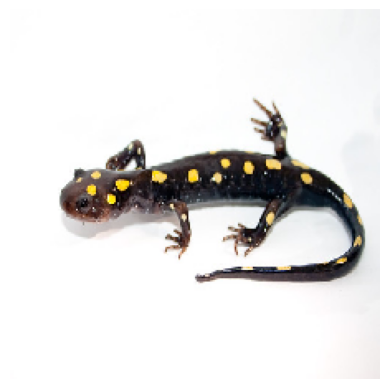

In [ ]:
# Cargar imagen de ejemplo
url = 'https://farm4.static.flickr.com/3438/3979528449_5cc665863c.jpg' # Cambiar esta imagen por cualquiera que se quiera probar

img_path = tf.keras.utils.get_file('spotted.jpg', url)
img = image.load_img(img_path, target_size=(224, 224))
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
predict_with_model(vgg,img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 640ms/step
spotted_salamander: 98.73%
common_newt: 0.71%
European_fire_salamander: 0.52%


In [ ]:
predict_with_model(resnet,img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step
spotted_salamander: 99.58%
European_fire_salamander: 0.39%
common_newt: 0.03%


In [ ]:
predict_with_model(efficientnet,img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
spotted_salamander: 35.87%
banded_gecko: 16.83%
common_newt: 15.46%


## Analizando las métricas de las predicciones

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 598ms/step
VGG-16 Predicción: Clase 28, Confianza: 0.9873, Tiempo: 0.6865s


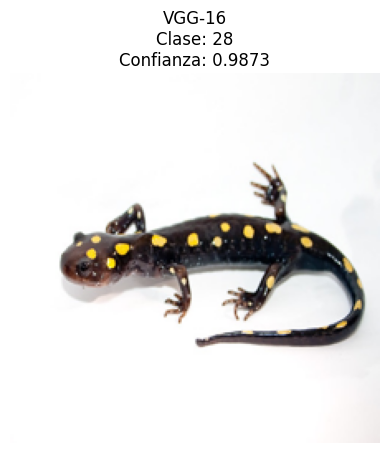

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
ResNet-50 Predicción: Clase 28, Confianza: 0.9958, Tiempo: 0.3742s


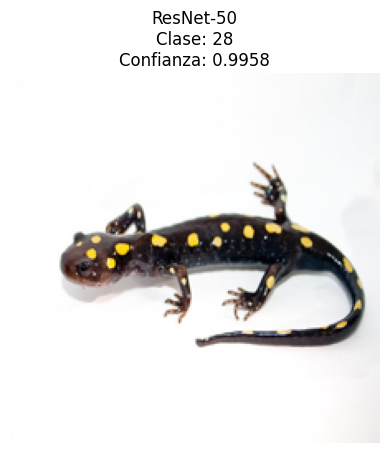

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
EfficientNet-B0 Predicción: Clase 28, Confianza: 0.3587, Tiempo: 0.2081s


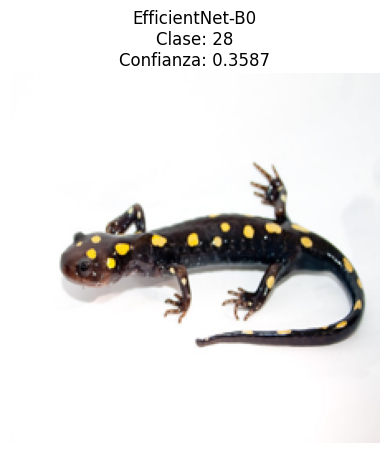

In [ ]:
img, img_array = load_image(url)

vgg_metrics = show_prediction(vgg, img, img_array, "VGG-16")
resnet_metrics = show_prediction(resnet, img, img_array, "ResNet-50")
efficientnet_metrics = show_prediction(efficientnet, img, img_array, "EfficientNet-B0")


In [ ]:
metrics = [vgg_metrics, resnet_metrics, efficientnet_metrics]
df = pd.DataFrame(metrics)
print(df)

            Modelo  Clase Predicha  Confianza    Tiempo
0           VGG-16              28   0.987275  0.686454
1        ResNet-50              28   0.995797  0.374207
2  EfficientNet-B0              28   0.358708  0.208067


<ipython-input-39-4a465bf6b673>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Modelo", y="Confianza", data=df, palette="Blues")


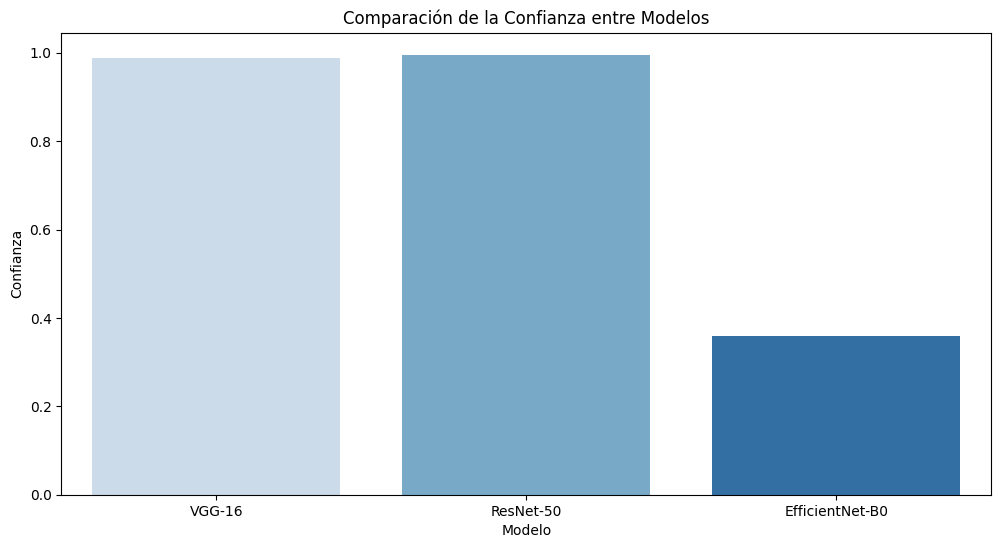

<ipython-input-39-4a465bf6b673>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Modelo", y="Tiempo", data=df, palette="Oranges")


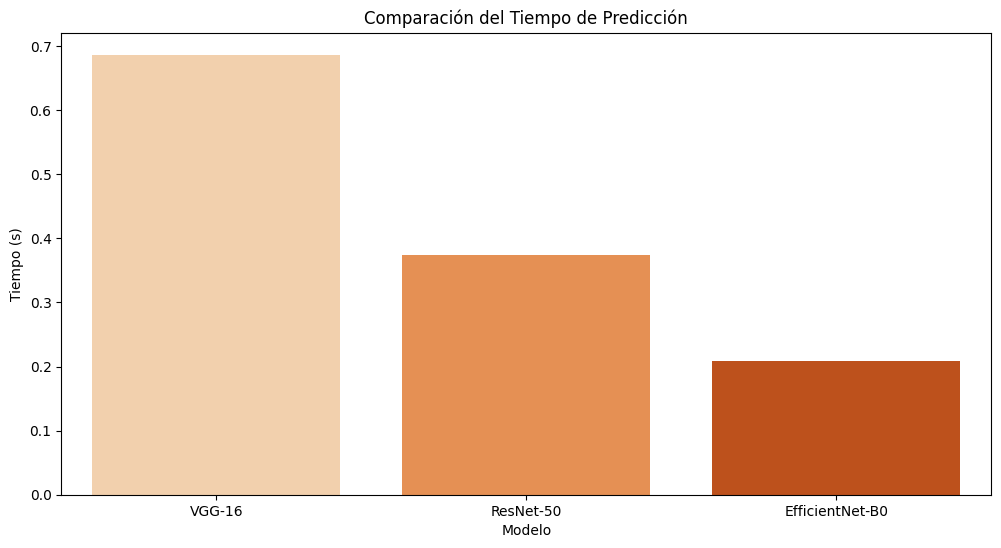

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x="Modelo", y="Confianza", data=df, palette="Blues")
plt.title("Comparación de la Confianza entre Modelos")
plt.ylabel("Confianza")
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x="Modelo", y="Tiempo", data=df, palette="Oranges")
plt.title("Comparación del Tiempo de Predicción")
plt.ylabel("Tiempo (s)")
plt.show()


In [ ]:
best_model = df.loc[df["Confianza"].idxmax()]["Modelo"]
print(f"El modelo con mayor confianza es: {best_model}")

fastest_model = df.loc[df["Tiempo"].idxmin()]["Modelo"]
print(f"El modelo más rápido es: {fastest_model}")


El modelo con mayor confianza es: ResNet-50
El modelo más rápido es: EfficientNet-B0
